#biar cepet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [2]:
def load_data():
  data = pd.read_excel('stemming_label_2.xlsx')
  return data

df = load_data()
df.head()

,isi,label
0,bonus guna metode bayar transaksi sesuai prose...,NEGATIVE
1,suka belanja tokopedia diskon kembali dana bar...,NEGATIVE
2,tokopedia keren gratis ongkos kirim pelit prom...,POSITIVE
3,baru buruk kali buka produk sebentar beranda u...,NEGATIVE
4,mohon sembunyi toko aktif produk habis jual ak...,NEGATIVE


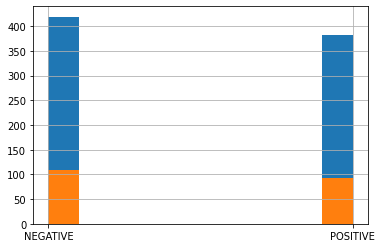

In [3]:
#Diagram Untuk melihat Perbandingan antara Class data data training dan testing  dan pembuatan data testing pada Test size sebesar 0.2 atau 20% dan otomatis data training 0.8 80%
x_train, x_test, y_train, y_test = model_selection.train_test_split(df['isi'],df['label'],test_size=0.2, random_state=10)
y_train.hist()
y_test.hist()

In [4]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(y_train)
test_y = Encoder.transform(y_test)

In [13]:
#membuat CountVectorizer dengan menggunakan Unigram+bigram
cv = CountVectorizer(ngram_range=(1,2)) #1 = uni // 2 = bi // 3 = tri
cv.fit_transform(x_train)
len(cv.get_feature_names_out())

11599

In [14]:
print("Vocabulary: ", cv.vocabulary_)

Vocabulary:  {'tokopedia': 10495, 'repot': 8736, 'seleksi': 9297, 'orang': 7408, 'buka': 2154, 'toko': 10422, 'beli': 1753, 'barang': 1085, 'kirim': 5257, 'produk': 8284, 'sesuai': 9428, 'prosedur': 8461, 'susah': 9872, 'pesan': 7960, 'sedia': 9254, 'member': 6596, 'gold': 3594, 'silver': 9564, 'turun': 11071, 'hapus': 3884, 'pasang': 7728, 'tokopedia repot': 10733, 'repot seleksi': 8741, 'seleksi orang': 9298, 'orang buka': 7415, 'buka toko': 2175, 'toko beli': 10432, 'beli barang': 1764, 'barang kirim': 1148, 'kirim produk': 5402, 'produk kirim': 8309, 'kirim sesuai': 5422, 'sesuai prosedur': 9456, 'prosedur prosedur': 8463, 'prosedur susah': 8464, 'susah pesan': 9885, 'pesan sedia': 8022, 'sedia barang': 9256, 'barang member': 1168, 'member gold': 6597, 'gold silver': 3596, 'silver turun': 9566, 'turun hapus': 11074, 'hapus pasang': 3894, 'bayar': 1413, 'alfamart': 263, 'kena': 5108, 'biaya': 1958, 'administrasi': 37, 'menit': 6632, 'transaksi': 10892, 'batal': 1321, 'dana': 2645, '

In [15]:
#memanggil Nama fitur
gf = cv.get_feature_names_out()
print(gf)

['abai' 'abai abai' 'abai administrasi' ... 'zakat suka' 'zoning'
 'zoning jaring']


In [ ]:
X_train = cv.fit_transform(x_train)
X_test = cv.transform(x_test)

In [ ]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",train_y.shape)
print("y_test_shape : ",test_y.shape)

X_train_shape :  (800, 11599)
X_test_shape :  (200, 11599)
y_train_shape :  (800,)
y_test_shape :  (200,)


In [ ]:
print("x_train : \n",X_train)
print("\n x_test : \n",X_test)
print("\n y_train : \n",train_y)
print("\n y_test : \n",test_y)

x_train : 
   (0, 10495)	1
  (0, 8736)	1
  (0, 9297)	1
  (0, 7408)	1
  (0, 2154)	1
  (0, 10422)	1
  (0, 1753)	1
  (0, 1085)	2
  (0, 5257)	2
  (0, 8284)	1
  (0, 9428)	1
  (0, 8461)	2
  (0, 9872)	1
  (0, 7960)	1
  (0, 9254)	1
  (0, 6596)	1
  (0, 3594)	1
  (0, 9564)	1
  (0, 11071)	1
  (0, 3884)	1
  (0, 7728)	1
  (0, 10733)	1
  (0, 8741)	1
  (0, 9298)	1
  (0, 7415)	1
  :	:
  (799, 6641)	2
  (799, 4913)	1
  (799, 9978)	2
  (799, 5230)	2
  (799, 4598)	2
  (799, 7263)	1
  (799, 7109)	1
  (799, 11332)	1
  (799, 2556)	1
  (799, 2068)	1
  (799, 9707)	1
  (799, 2306)	1
  (799, 6651)	2
  (799, 5234)	1
  (799, 3249)	1
  (799, 6949)	1
  (799, 7110)	1
  (799, 2557)	1
  (799, 2069)	1
  (799, 9708)	1
  (799, 5238)	1
  (799, 9577)	1
  (799, 6972)	1
  (799, 11333)	1
  (799, 2307)	1

 x_test : 
   (0, 816)	1
  (0, 2404)	1
  (0, 6915)	1
  (0, 8465)	1
  (0, 9244)	1
  (0, 9781)	1
  (0, 9806)	1
  (0, 10495)	1
  (1, 332)	1
  (1, 457)	1
  (1, 524)	1
  (1, 1085)	1
  (1, 1228)	1
  (1, 1753)	1
  (1, 4937)	1
  (1, 

#Multinomial Naive Bayes

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train, train_y)

MultinomialNB()

In [ ]:
scores = cross_val_score(MNB, X_train, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(MNB, X_train, train_y, cv=10).mean())

[0.85   0.875  0.85   0.85   0.9125 0.85   0.8875 0.8875 0.85   0.85  ]
K-Fold Mean ->  0.86625


In [ ]:
MNB_pred = MNB.predict(X_test)

In [ ]:
print(confusion_matrix(MNB_pred, test_y))
print("MNB Accuracy Score -> ",accuracy_score(test_y, MNB_pred)*100)
print("MNB Recall Score -> ",recall_score(test_y, MNB_pred)*100)
print("MNB Precision Score -> ",precision_score(test_y, MNB_pred)*100)
print("MNB f1 Score -> ",f1_score(test_y, MNB_pred)*100)

[[94 19]
 [14 73]]
MNB Accuracy Score ->  83.5
MNB Recall Score ->  79.34782608695652
MNB Precision Score ->  83.9080459770115
MNB f1 Score ->  81.56424581005585


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       108
           1       0.84      0.79      0.82        92

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200


Confusion Matrix:


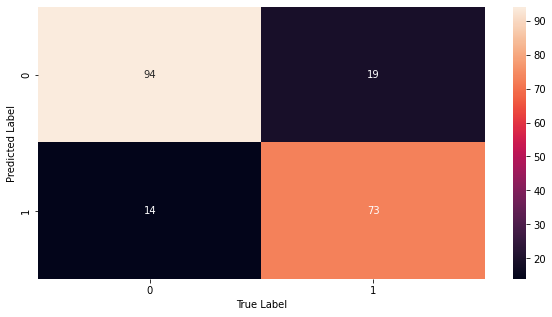



True Positive :  73
True Negative :  94
False Positive :  14
False Negative  :  19


In [ ]:
print("Classification Report:")
print(classification_report(test_y, MNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(MNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, MNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(test_y, MNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.165


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_MNB = pd.DataFrame({'prediksi':MNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_MNB['prediksi'].value_counts()/df_result_MNB['prediksi'].count()*100)
df_persen_svm

,prediksi
0,56.50%
1,43.50%


#Bernoulli Naive Bayes

In [ ]:
BNB = BernoulliNB()
BNB.fit(X_train, train_y)

BernoulliNB()

In [ ]:
scores = cross_val_score(BNB, X_train, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(BNB, X_train, train_y, cv=10).mean())

[0.8625 0.8875 0.8125 0.85   0.85   0.8375 0.8375 0.875  0.8125 0.85  ]
K-Fold Mean ->  0.8474999999999999


In [ ]:
BNB_pred = BNB.predict(X_test)

In [ ]:
print(confusion_matrix(BNB_pred, test_y))
print("BNB Accuracy Score -> ",accuracy_score(test_y, BNB_pred)*100)
print("BNB Recall Score -> ",recall_score(test_y, BNB_pred)*100)
print("BNB Precision Score -> ",precision_score(test_y, BNB_pred)*100)
print("BNB f1 Score -> ",f1_score(test_y, BNB_pred)*100)

[[87 11]
 [21 81]]
BNB Accuracy Score ->  84.0
BNB Recall Score ->  88.04347826086956
BNB Precision Score ->  79.41176470588235
BNB f1 Score ->  83.50515463917525


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.84       108
           1       0.79      0.88      0.84        92

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200


Confusion Matrix:


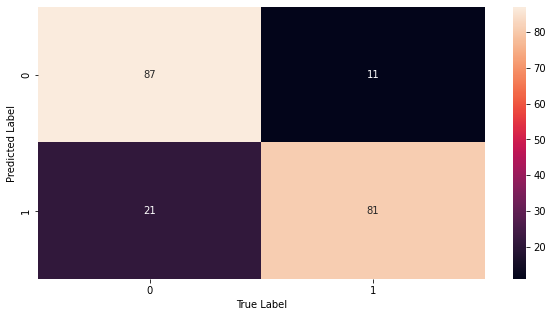



True Positive :  81
True Negative :  87
False Positive :  21
False Negative  :  11


In [ ]:
print("Classification Report:")
print(classification_report(test_y, BNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(BNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, BNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(test_y, BNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.16


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_BNB = pd.DataFrame({'prediksi':BNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_BNB['prediksi'].value_counts()/df_result_BNB['prediksi'].count()*100)
df_persen_svm

,prediksi
1,51.00%
0,49.00%


#Hitung nilai C

In [ ]:
for c in [0.01, 0.05, 0.25, 0.5, 1, 1.01, 1.05, 1.25, 1.5, 2, 2.01, 2.05, 2.25, 2.5, 3]: # Menghitung nilai C
	sv = SVC(C=c)
	sv.fit(X_train, train_y)
	print('Accuracy fot C=%s: %s'
	%(c,accuracy_score(test_y, sv.predict(X_test)))) 

Accuracy fot C=0.01: 0.54
Accuracy fot C=0.05: 0.735
Accuracy fot C=0.25: 0.78
Accuracy fot C=0.5: 0.82
Accuracy fot C=1: 0.855
Accuracy fot C=1.01: 0.855
Accuracy fot C=1.05: 0.855
Accuracy fot C=1.25: 0.855
Accuracy fot C=1.5: 0.855
Accuracy fot C=2: 0.855
Accuracy fot C=2.01: 0.855
Accuracy fot C=2.05: 0.855
Accuracy fot C=2.25: 0.855
Accuracy fot C=2.5: 0.855
Accuracy fot C=3: 0.855


# Linear

In [ ]:
linear = SVC(kernel='linear', C=3)
linear.fit(X_train, train_y)

SVC(C=3, kernel='linear')

In [ ]:
scores = cross_val_score(linear, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(linear,X_train, train_y, cv=10).mean())

[0.875  0.9125 0.85   0.825  0.875  0.85   0.8625 0.8375 0.8375 0.875 ]
K-Fold Mean ->  0.8600000000000001


In [ ]:
linear_pred = linear.predict(X_test)

In [ ]:
print(confusion_matrix(linear_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, linear_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, linear_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, linear_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, linear_pred)*100)

[[92 11]
 [16 81]]
SVM Accuracy Score ->  86.5
SVM Recall Score ->  88.04347826086956
SVM Precision Score ->  83.50515463917526
SVM f1 Score ->  85.71428571428571


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       108
           1       0.84      0.88      0.86        92

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200


Confusion Matrix:


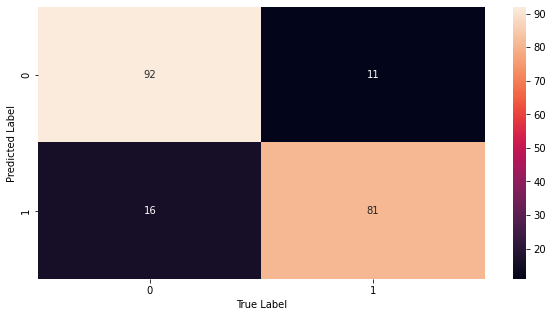



True Positive :  81
True Negative :  92
False Positive :  16
False Negative  :  11


In [ ]:
print("Classification Report:")
print(classification_report(test_y, linear_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(linear_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, linear_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(test_y, linear_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.135


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_linear = pd.DataFrame({'prediksi':linear_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_linear['prediksi'].value_counts()/df_result_linear['prediksi'].count()*100)
df_persen_svm

,prediksi
0,51.50%
1,48.50%


# Polynomial 

In [ ]:
poly = SVC(kernel='poly', C=3)
poly.fit(X_train, train_y)

SVC(C=3, kernel='poly')

In [ ]:
scores = cross_val_score(poly, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(poly,X_train, train_y, cv=10).mean())

[0.6375 0.675  0.5625 0.575  0.575  0.5875 0.6    0.625  0.575  0.6   ]
K-Fold Mean ->  0.6012500000000001


In [ ]:
poly_pred = poly.predict(X_test)

In [ ]:
print(confusion_matrix(poly_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, poly_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, poly_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, poly_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, poly_pred)*100)

[[28  2]
 [80 90]]
SVM Accuracy Score ->  59.0
SVM Recall Score ->  97.82608695652173
SVM Precision Score ->  52.94117647058824
SVM f1 Score ->  68.70229007633587


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.26      0.41       108
           1       0.53      0.98      0.69        92

    accuracy                           0.59       200
   macro avg       0.73      0.62      0.55       200
weighted avg       0.75      0.59      0.54       200


Confusion Matrix:


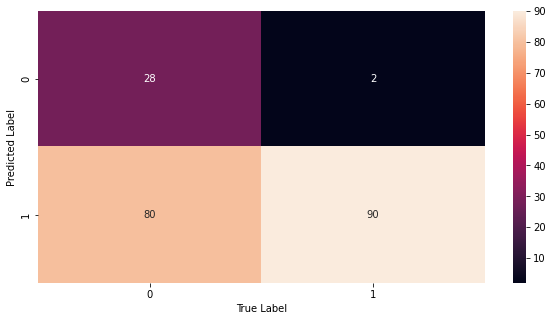



True Positive :  90
True Negative :  28
False Positive :  80
False Negative  :  2


In [ ]:
print("Classification Report:")
print(classification_report(test_y, poly_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(poly_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, poly_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(test_y, poly_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.41


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_poly = pd.DataFrame({'prediksi':poly_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_poly['prediksi'].value_counts()/df_result_poly['prediksi'].count()*100)
df_persen_svm

,prediksi
1,85.00%
0,15.00%


# Radial Basis Function

In [ ]:
rbf = SVC(kernel='rbf', C=3, gamma=0.50 )
rbf.fit(X_train, train_y)

SVC(C=3, gamma=0.5)

In [ ]:
scores = cross_val_score(rbf, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(rbf,X_train, train_y, cv=10).mean())

[0.5375 0.525  0.525  0.5375 0.525  0.5375 0.525  0.525  0.525  0.5125]
K-Fold Mean ->  0.5275000000000001


In [ ]:
rbf_pred = rbf.predict(X_test)

In [ ]:
print(confusion_matrix(rbf_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, rbf_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, rbf_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, rbf_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, rbf_pred)*100)

[[107  90]
 [  1   2]]
SVM Accuracy Score ->  54.50000000000001
SVM Recall Score ->  2.1739130434782608
SVM Precision Score ->  66.66666666666666
SVM f1 Score ->  4.2105263157894735


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.99      0.70       108
           1       0.67      0.02      0.04        92

    accuracy                           0.55       200
   macro avg       0.60      0.51      0.37       200
weighted avg       0.60      0.55      0.40       200


Confusion Matrix:


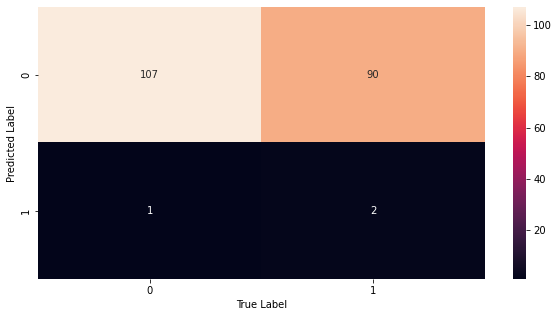



True Positive :  2
True Negative :  107
False Positive :  1
False Negative  :  90


In [ ]:
print("Classification Report:")
print(classification_report(test_y, rbf_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(rbf_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, rbf_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)



In [ ]:
mae = mean_absolute_error(test_y, rbf_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.455


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_rbf = pd.DataFrame({'prediksi':rbf_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_rbf['prediksi'].value_counts()/df_result_rbf['prediksi'].count()*100)
df_persen_svm

,prediksi
0,98.50%
1,1.50%


# Sigmoid

In [ ]:
sig = SVC(kernel='sigmoid', C=3)
sig.fit(X_train, train_y)

SVC(C=3, kernel='sigmoid')

In [ ]:
scores = cross_val_score(sig, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(sig,X_train, train_y, cv=10).mean())

[0.875  0.8875 0.875  0.8    0.85   0.8625 0.825  0.8375 0.85   0.85  ]
K-Fold Mean ->  0.85125


In [ ]:
sig_pred = sig.predict(X_test)

In [ ]:
print(confusion_matrix(sig_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, sig_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, sig_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, sig_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, sig_pred)*100)

[[90 14]
 [18 78]]
SVM Accuracy Score ->  84.0
SVM Recall Score ->  84.78260869565217
SVM Precision Score ->  81.25
SVM f1 Score ->  82.97872340425533


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       108
           1       0.81      0.85      0.83        92

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200


Confusion Matrix:


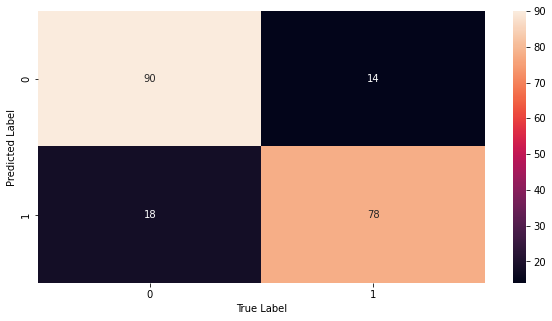



True Positive :  78
True Negative :  90
False Positive :  18
False Negative  :  14


In [ ]:
print("Classification Report:")
print(classification_report(test_y, sig_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(sig_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, sig_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [ ]:
mae = mean_absolute_error(test_y, sig_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.16


In [ ]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_sig = pd.DataFrame({'prediksi':sig_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_sig['prediksi'].value_counts()/df_result_sig['prediksi'].count()*100)
df_persen_svm

,prediksi
0,52.00%
1,48.00%
